<h1>CS4618 Assignment</h1>

In [157]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
import pandas as pd
import numpy as np

from seaborn import lmplot, stripplot

from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_absolute_error

from pandas.plotting import scatter_matrix
from seaborn import scatterplot, heatmap

<h2>Read in the data</h2>

In [159]:
# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv("../datasets/dataset_salaries.csv")

<h2>Shuffle the data</h2>

In [160]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=2)
df.reset_index(drop=True, inplace=True)

<h2>Find the dimensions of the dataset</h2>

In [161]:
# The dimensions
df.shape

(62642, 17)

<h2>Information about the dataset types</h2>

In [162]:
# The columns, their datatypes and whether there are nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62527 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  int64  
 7   yearsatcompany           62642 non-null  int64  
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  int64  
 10  stockgrantvalue          62642 non-null  int64  
 11  bonus                    62642 non-null  int64  
 12  gender                   43102 non-null  object 
 13  otherdetails             40139 non-null  object 
 14  cityid                

<h2>Summary of the dataset</h2>

In [163]:
# Summary statistics
df.describe(include="all")

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
count,62642,62637,62527,62642,6.264200e+04,62642,62642.000000,62642.000000,61788,6.264200e+04,6.264200e+04,62642.000000,43102,40139,62642.000000,62640.000000,62642.000000
unique,62561,1869,3071,15,NaN,1050,NaN,NaN,3271,NaN,NaN,NaN,4,40132,NaN,NaN,NaN
top,1/10/2019 21:44:02,Amazon,L4,Software Engineer,NaN,"Seattle, WA",NaN,NaN,Full Stack,NaN,NaN,NaN,Male,twauesly,NaN,NaN,NaN
freq,3,8054,5008,41231,NaN,8701,NaN,NaN,11382,NaN,NaN,NaN,35702,2,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.175327e+03,NaN,7.191054,2.700616,NaN,1.798145e+03,1.134865e+03,242.317199,NaN,NaN,9856.201989,616.097222,41694.723732
std,NaN,NaN,NaN,NaN,3.877877e+04,NaN,6.437148,3.524030,NaN,1.927194e+04,2.520611e+04,3709.187697,NaN,NaN,6679.104563,289.843390,24488.865879
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000,NaN,0.000000e+00,0.000000e+00,0.000000,NaN,NaN,0.000000,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,1.160000e+02,NaN,3.000000,0.000000,NaN,8.800000e+01,0.000000e+00,1.000000,NaN,NaN,7369.000000,506.000000,20069.250000
50%,NaN,NaN,NaN,NaN,1.830000e+02,NaN,6.000000,1.000000,NaN,1.310000e+02,2.300000e+01,13.000000,NaN,NaN,7839.000000,807.000000,42019.000000
75%,NaN,NaN,NaN,NaN,2.690000e+02,NaN,10.000000,4.000000,NaN,1.810000e+02,6.400000e+01,27.000000,NaN,NaN,11521.000000,807.000000,63021.750000


<h2>Look at the first few rows</h2>
    <body>*This may be considered leakage</body>

In [164]:
# Maybe have a look at a few rows
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,11/3/2020 10:26:30,Microsoft,60,Data Scientist,181,"Redmond, WA",1,1,ML / AI,104,47,30,Male,mckeiaps hash ghaart gronds wuit zearts tsiott...,11521,819.0,47529
1,8/14/2018 21:08:29,VMware,Senior MTS,Software Engineer,0,"Palo Alto, CA",5,3,Full Stack,0,0,0,NaN,NaN,7351,807.0,1418
2,5/18/2019 0:32:17,Paypal,T25,Software Engineer,213,"San Francisco, CA",7,1,API Development (Back-End),180,19,14,Male,NaN,7419,807.0,8815
3,8/3/2021 20:25:07,Trend Micro,Senior Engineer,Software Engineer,18,"Taipei, TP, Taiwan",2,2,Distributed Systems (Back-End),14,1,3,Male,mcclieusp hyoully preebly gloiands screoch sch...,6744,0.0,81297
4,5/3/2021 15:25:42,Visa,Senior Software Engineer,Software Engineer,179,"Austin, TX",3,0,Full Stack,158,9,12,Female,dyniawn cauny spliur cleals crungs kwoiw thrai...,10965,635.0,68303


<h2>Add the features to an array and create two subsets lists of the features for the numeric and nominal values</h2>

In [165]:
features = ["timestamp", "company", "level", "title", "totalyearlycompensation", "location", "yearsofexperience", "yearsatcompany", "tag", "basesalary", "stockgrantvalue", "bonus", "gender", "otherdetails", "cityid", "dmaid", "rowNumber"]
numeric_features = ["totalyearlycompensation", "yearsofexperience", "yearsatcompany", "basesalary", "stockgrantvalue", "bonus", "cityid", "dmaid", "rowNumber"]
nominal_features = ["timestamp", "company", "level", "title", "location", "tag", "gender", "otherdetails"]

<h2>Print the unique nominal features in a list</h2>
<body>This allows me to be able to see if there is any not plausible values</body>

In [166]:
# The values, in the case of nominal-valued features
for feature in nominal_features:
    print(feature, df[feature].unique())
    print("\n")

timestamp ['11/3/2020 10:26:30' '8/14/2018 21:08:29' '5/18/2019 0:32:17' ...
 '4/22/2019 13:18:06' '11/3/2020 19:56:58' '6/22/2020 17:28:08']


company ['Microsoft' 'VMware' 'Paypal' ... 'World wide technology '
 'cadence design systems' '\xa0Google']


level ['60' 'Senior MTS' 'T25' ... 'Lead software engineer ' 'Senior L1'
 'Level 26']


title ['Data Scientist' 'Software Engineer' 'Management Consultant' 'Marketing'
 'Hardware Engineer' 'Human Resources' 'Product Manager'
 'Business Analyst' 'Product Designer' 'Software Engineering Manager'
 'Recruiter' 'Solution Architect' 'Technical Program Manager'
 'Mechanical Engineer' 'Sales']


location ['Redmond, WA' 'Palo Alto, CA' 'San Francisco, CA' ...
 'Mandaluyong City, MM, Philippines' 'Angeles City, PM, Philippines'
 'Pasir Ris, SG, Singapore']


tag ['ML / AI' 'Full Stack' 'API Development (Back-End)' ... 'Hardware Apps'
 'Creative Shop' 'Eng Ops']


gender ['Male' nan 'Female' 'Other' 'Title: Senior Software Engineer']


otherdetail

<h2>Features that need to be removed</h2>
<ul>
    <li>Remove</li>
    <ul>
        <li>Remove the "timestamp" column because there is no added value to know the time that it was given.</li>
        <li>Remove the "otherdetails" column becuse it is not related to base pay.</li>
        <li>Remove the "tag" column because there are too many unique values to one hot encode.</li>
        <li>Remove "totalyearlycompensation", "stockgrantvalue", and "bonus" because they are directly related to "basesalary".</li>
        <ul>
            <li> For example, "basesalary" + "stockgrantvalue" + "bonus" = "totalyearcompensation"</li>
        </ul>
        <li>Remove the "title" column because it does not add any value because of the variation of titles a persons job could have.</li>
        <li>Remove the "the rowNumber" column because the table already has an index of each row in the table.</li>
        <li>Remove the "location" column because the "cityid" column displays the same information so the "location" column is not needed.</li>
        <ul>
            <li>When testing, there were no invalid data types and all of the rows had a "cityid". </li>
        </ul>
        <li>Remove the "dmaid" column because </li>
        <li>Remove the gender["Title: Senior Software Engineer"] because as of my knowledge, there is not gender called "Title: Senior Software Engineer". 
            <ul>
                <li>My assumption would be that the user typed their title into the gender field. </li>
            </ul>
        <li>Remove the "yearsofexperience" that has a value of 90 years because the user cannot have more than 55 years experience because of the life expectancy of a human being.</li>
        <ul>
            <li>According to this study from the <a href="https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy">World Health Organization</a>, the average lift expectancy of a human is 73 years old and thus 90 years old is not a plausible value.</li>
        </ul>
        <li>Replace the "yearsatcompany" that has a value of 90 years because the user cannot have more than 55 years at a company because of the life expectancy of a human being.</li>
        <ul>
            <li>According to this study from the <a href="https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy">World Health Organization</a>, the average lift expectancy of a human is 73 years old and thus 90 years old is not a plausible value.</li>
        </ul>
        <li>Remove all rows from "gender" and "company" with a NaN value because it adds no value to the rest of the data.</li>
    </ul>
</ul>

In [167]:
# Delete columns that are not necessary (see explanation above)
df = (df[["company", "level", "yearsofexperience", "yearsatcompany", "basesalary", "gender", "cityid"]]).copy()
numeric_features = ["yearsofexperience", "yearsatcompany", "basesalary", "cityid"]
nominal_features = ["company", "level", "gender"]

# Delete examples whose years are too large
df = (df[(df["yearsatcompany"] < 55) & (df["yearsofexperience"] < 55)]).copy()
df = (df[(df["yearsofexperience"] != 0)]).copy()
df = (df[(df["gender"] != 'Title: Senior Software Engineer')]).copy()
df.dropna(subset=["gender", "company"], inplace=True)
df = (df[(df["yearsatcompany"] < 55) & (df["yearsofexperience"] < 55)]).copy()

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the invalid data was filtered out
df.shape

(39889, 7)

<h2>Create the Test Set</h2>

In [168]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)
dev_df

,company,level,yearsofexperience,yearsatcompany,basesalary,gender,cityid
22939,Microsoft,62,4,9,213,Male,11521
35799,SAS Software,Associate Software Developer,1,1,38,Male,9592
35985,Red Hat,l6,10,4,186,Male,11532
32507,Intel,Grade 5,1,1,82,Female,10965
8281,Intuit,Software Engineer 2,3,2,97,Male,7322
...,...,...,...,...,...,...,...
31019,Google,L6,21,5,272,Male,7322
30280,Walmart,5,3,1,163,Male,9916
6637,Snap,L7,8,3,345,Female,7438
35343,Qualcomm,Senior Staff Eng,11,9,149,Male,1206


<h2>Data Exploration</h2>

In [169]:
# It can be good to do this on a copy of the dataset (excluding the test set, of course)
copy_df = dev_df.copy()

<body>The graphs below allow to see the distribution of data and look for trends</body>

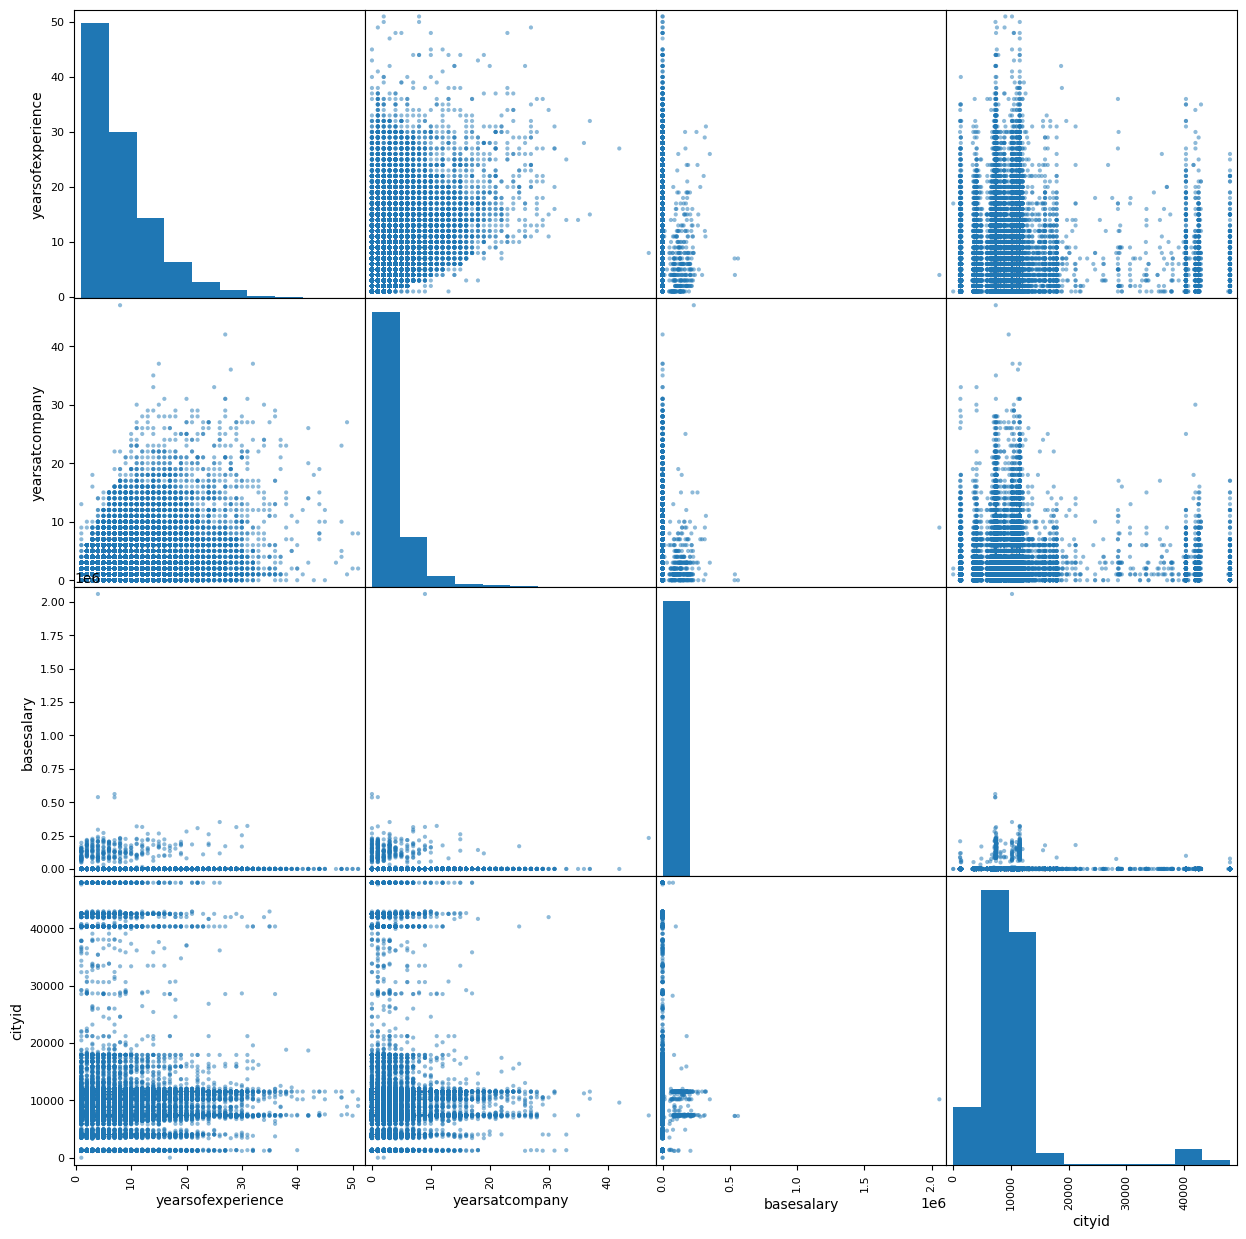

In [170]:
m = scatter_matrix(copy_df, figsize=(15, 15))

<body>This shows us that there is little to no correlation between teh different attributes of the table</body>

In [171]:
copy_df.corr()

/var/folders/j8/ylv5l0d16k3dcn6c05m3sbrh0000gn/T/ipykernel_48724/1653301174.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  copy_df.corr()


,yearsofexperience,yearsatcompany,basesalary,cityid
yearsofexperience,1.000000,0.389717,0.002303,-0.009365
yearsatcompany,0.389717,1.000000,0.011654,0.005253
basesalary,0.002303,0.011654,1.000000,-0.003981
cityid,-0.009365,0.005253,-0.003981,1.000000


<body>This is a dfferent way to represent correlation</body>

/var/folders/j8/ylv5l0d16k3dcn6c05m3sbrh0000gn/T/ipykernel_48724/1123110122.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap(copy_df.corr(), annot=True)


<AxesSubplot: >

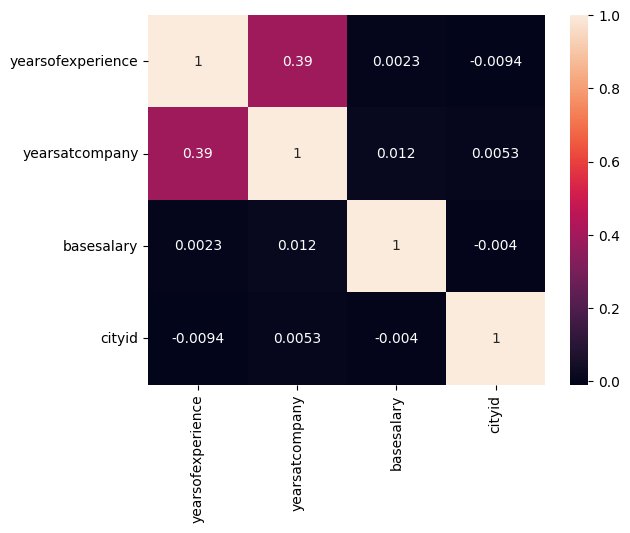

In [172]:
heatmap(copy_df.corr(), annot=True)

<h2>Feature Engineering</h2>
<body>I created this feature because it takes the ratio of years at a company divided by the years of experience</body>

In [173]:
dev_df["percentage_years"] = dev_df["yearsatcompany"] + dev_df["yearsofexperience"] / (dev_df["yearsofexperience"])
test_df["percentage_years"] = test_df["yearsatcompany"] + test_df["yearsofexperience"] / (test_df["yearsofexperience"])

dev_df[["percentage_years", "yearsofexperience", "yearsatcompany", "basesalary", "cityid"]].corr()

,percentage_years,yearsofexperience,yearsatcompany,basesalary,cityid
percentage_years,1.000000,0.389717,1.000000,0.011654,0.005253
yearsofexperience,0.389717,1.000000,0.389717,0.002303,-0.009365
yearsatcompany,1.000000,0.389717,1.000000,0.011654,0.005253
basesalary,0.011654,0.002303,0.011654,1.000000,-0.003981
cityid,0.005253,-0.009365,0.005253,-0.003981,1.000000


<body>This cell just makes sure that the new feature was added to the dataset</body>

In [174]:
# The dimensions
dev_df.shape

(31911, 8)

In [175]:
# Create the preprocessor
preprocessor = ColumnTransformer([
        ("scaler", StandardScaler(), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [176]:
class InsertPercentageYears(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.insert:
            X["percentage_years"] = X["yearsatcompany"] + X["yearsofexperience"] / (X["yearsofexperience"])
    
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [177]:
class MetaTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, transformer=None):
        self.transformer = transformer
        
    def fit(self, X, y=None):
        if self.transformer:
            self.transformer.fit(X, y)
        return self
    
    def transform(self, X, y=None):
        if self.transformer:
            return self.transformer.transform(X)
        else:
            return X

In [178]:
preprocessor = ColumnTransformer([
        ("num", Pipeline([("percentage_years", InsertPercentageYears()),
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", MetaTransformer())]), 
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")), 
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]), 
                nominal_features)],
        remainder="passthrough")

In [179]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[dev_df.columns]
test_X = test_df[test_df.columns]

# Target values, converted to a 1D numpy array
dev_y = dev_df["basesalary"].values
test_y = test_df["basesalary"].values

In [180]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsRegressor())])

# Create a dictionary of hyperparameters for kNN
knn_param_grid = {"predictor__n_neighbors": [1, 2, 3, 4, 6],
                  "preprocessor__num__percentage_years__insert": [True, False],
                  "preprocessor__num__scaler__transformer": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Create the grid search object which will find the best hyperparameter values based on validation error
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="neg_mean_absolute_error", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

({'predictor__n_neighbors': 2,
  'preprocessor__num__percentage_years__insert': False,
  'preprocessor__num__scaler__transformer': RobustScaler()},
 -75.84955711807723)

In [181]:
knn.set_params(**knn_gs.best_params_) 
scores = cross_validate(knn, dev_X, dev_y, cv=10, 
                        scoring="neg_mean_absolute_error", return_train_score=True)
print("Training error: ", np.mean(np.abs(scores["train_score"])))
print("Validation error: ", np.mean(np.abs(scores["test_score"])))

Training error:  39.49510993675535
Validation error:  75.84955711807723


<body>The model is overfitting because the validation error is significantly higher than the training error</body>

In [182]:
# Now we test on the test set
mean_absolute_error(test_y, knn_gs.predict(test_X))

35.657056906492855

<h2>Conclusion</h2>
<body>The model that was created was overfitting the data and thus more testing can be done to get less error. The next approach would be able to change the data cleaning and the hyperparameters to tweak and fine tune the model</body>